In [70]:
#导入包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
#读数据
data = pd.read_csv('ex1/ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [72]:
#查看数据属性
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


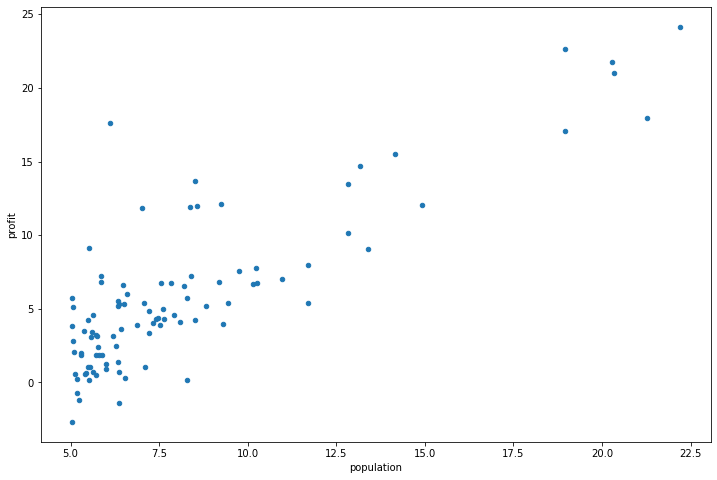

In [73]:
#图形表示数据
data.plot(kind='scatter',x='population',y='profit',figsize=(12,8))
plt.show()

In [74]:
#代价函数
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) -y),2)
    
    return  np.sum(inner) / (2*len(X))

In [75]:
data.insert(0,'ones',1)
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [76]:
#设置训练集

X= data.loc[:,['ones','population']]
y= data.loc[:,['profit']]

In [77]:
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [78]:
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [79]:
X = np.matrix(X.values)
y = np.matrix(y.values)

#X = np.array(X.values)
#y = np.array(y.values)

In [80]:
theta = np.matrix(np.array([0,0]))
(X * (theta.T))[:5,:]

matrix([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [81]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [82]:
computeCost(X,y,theta)

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

求导后得：

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha\frac{1}{m}\sum\limits_{i=1}^{m}{{{\left(\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)x_j^{(i)}\right)}}}$$

In [83]:
# batch gradient decent（批量梯度下降）

def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1]) 
    history_cost = np.zeros(iters) 
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j]= theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        history_cost[i] = computeCost(X, y, theta)
            
    return theta,history_cost

In [84]:
#学习速率α和要执行的迭代次数。
alpha = 0.01
iters = 1000

In [85]:
g,history_cost = gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [90]:
df_history_cost = pd.DataFrame(history_cost)
df_history_cost.describe()

,0
count,1000.000000
mean,4.865067
std,0.371853
min,4.515956
25%,4.572973
50%,4.713383
75%,5.059153
max,6.737190


In [91]:
computeCost(X, y, g)

4.515955503078912

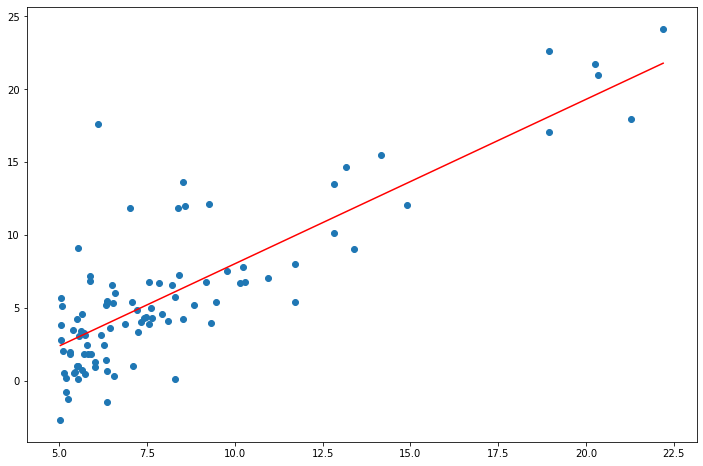

In [93]:
#绘制线性模型以及数据

x = np.linspace(data.population.min(),data.population.max(),100)
f = g[0,0] + (g[0,1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.population,data.profit,label='Training Data')
plt.show()